###Aluna: ANDRÉA FONSECA

# Exercício Regressão Linear com PyTorch

Este notebook é um exercício baseado no notebook:
- [LinearRegressionIrisNumPy.ipynb](LinearRegressionIrisNumPy.ipynb) feito em NumPy,

O objetivo desse notebook é reescrevê-lo porém utilizando tensores do PyTorch.

Os nomes das funções do PyTorch são próximas das funções do Torch original escrito
na linguagem Lua, porém não são iguais.

## Importação dos pacotes

In [1]:
# http://pytorch.org/
from os.path import exists
#!pip install numpy==1.15.0
!pip install -q install wheel==0.34.2 setuptools

from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
print(get_abbr_impl())
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#https://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp37-cp37m-linux_x86_64.whl
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1.post2-{platform}-linux_x86_64.whl torchvision
import torch

cp
  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl
ERROR: Could not install requirement torch==0.4.1.post2 from http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl for URL http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl


In [2]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

def print_assert(r):
    if r:
        return 'OK!'
    else:
        return 'Incorreto!'

## Dataset

### Leitura dos dados

In [3]:
import pandas as pd
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_in = data[:,0:1]
y_in = data[:,1:2]

x_train = torch.FloatTensor(x_in)
y_train = torch.FloatTensor(y_in)

n_samples = x_train.size(0)
print('x_train.shape:',x_train.shape, type(x_train))
print('y_train.shape:',y_train.shape, type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

iris_pd = pd.DataFrame(x_in, columns=['x_in'])
iris_pd['y_in'] = y_in
iris_pd.head()

x_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
x_train[:5]:
 tensor([[7.0000],
        [6.4000],
        [6.9000],
        [5.5000],
        [6.5000]])
y_train[:5]:
 tensor([[4.7000],
        [4.5000],
        [4.9000],
        [4.0000],
        [4.6000]])


,x_in,y_in
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6


### Normalização dos dados

Text(0, 0.5, 'Comprimento petalas')

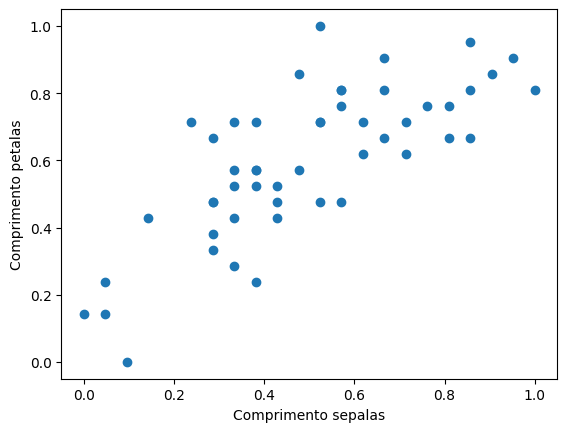

In [13]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

### Exercício 1 - criação do `x_train_bias`

faça o `x_train_bias` ser uma matriz com 1s na primeira coluna e x_train na segunda coluna.




Dica: você pode precisar da função [torch.cat](http://pytorch.org/docs/master/torch.html#torch.cat) e [torch.ones](http://pytorch.org/docs/master/torch.html#torch.ones).

In [22]:
ones = torch.ones(n_samples, 1)

In [23]:
x_train_bias = torch.cat((ones, x_train), dim=1)
print(x_train_bias.size())

torch.Size([50, 2])


In [24]:
# Verificação do exercício - Execute para testar sua implementação

print('x_train_bias é um tensor: {}'.format(print_assert(
    isinstance(x_train_bias, torch.FloatTensor)
)))


print('tamanho do x_train_bias: {}'.format(print_assert(
    x_train_bias.size() == torch.Size([50, 2])
)))

print('primeira coluna é só de uns: {}'.format(print_assert(
    (x_train_bias[:, 0] - torch.ones(n_samples)).sum() == 0
)))

print('segunda coluna é igual a x_train: {}'.format(print_assert(
    (x_train_bias[:, 1] - x_train.reshape(50)).sum() == 0
)))


x_train_bias é um tensor: OK!
tamanho do x_train_bias: OK!
primeira coluna é só de uns: OK!
segunda coluna é igual a x_train: OK!


In [25]:
print(x_train_bias[:, 1].shape)
print(x_train.shape)

torch.Size([50])
torch.Size([50, 1])


## Modelo da rede

### Definição da classe

In [55]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = torch.Tensor(n_out, n_in)
        self.w.uniform_(-0.1,0.1) #inicialização dos parâmetros

    def forward(self, x_bias):
        return x_bias.matmul(torch.t(self.w))

### Instanciando a rede

In [56]:
model = Net(2,1) # duas entradas e uma saída: entradas são os comprimentos de pétala e sépala e a saída é a classificação da flor

### Testando o predict da rede

In [57]:
model.forward(torch.ones((4,2)))

tensor([[0.0628],
        [0.0628],
        [0.0628],
        [0.0628]])

In [37]:
# model.forward(torch.randn(4,2))

tensor([[ 0.0391],
        [-0.0135],
        [ 0.0158],
        [-0.0117]])

## Treinamento

### Exercício 2 - Treinamento

Refaça o código de treinamento da rede, mas agora utilizando somente Tensores do PyTorch. Faça o mesmo procedimento que o notebook [LinearRegressionIrisNumPy](LinearRegressionIrisNumPy.ipynb). Para consultar as operações disponíveis no PyTorch use a [documentação do PyTorch](http://pytorch.org/docs/master/torch.html).

Funções que podem ser úteis:
- torch.t
- torch.mean
- torch.matmul

In [58]:
x_train_bias.t()

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.7143, 0.9524, 0.2857, 0.7619, 0.3810, 0.6667, 0.0000, 0.8095,
         0.1429, 0.0476, 0.4762, 0.5238, 0.5714, 0.3333, 0.8571, 0.3333, 0.4286,
         0.6190, 0.3333, 0.4762, 0.5714, 0.6667, 0.5714, 0.7143, 0.8095, 0.9048,
         0.8571, 0.5238, 0.3810, 0.2857, 0.2857, 0.4286, 0.5238, 0.2381, 0.5238,
         0.8571, 0.6667, 0.3333, 0.2857, 0.2857, 0.5714, 0.4286, 0.0476, 0.3333,
         0.3810, 0.3810, 0.6190, 0.0952, 0.3810]])

In [59]:
num_epochs = 100 # iterações de treinamento
learning_rate = 0.5

for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda (usando MSE)
    loss = torch.mean((y_pred - y_train)**2)

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * x_train_bias.t().matmul(x_train_bias.matmul(model.w.t()) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.t()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[20/100], loss: 0.023408
Epoch[40/100], loss: 0.021494
Epoch[60/100], loss: 0.021216
Epoch[80/100], loss: 0.021176
Epoch[100/100], loss: 0.021170


### Valor ótimo, solução analítica

## Avaliação

### Predict

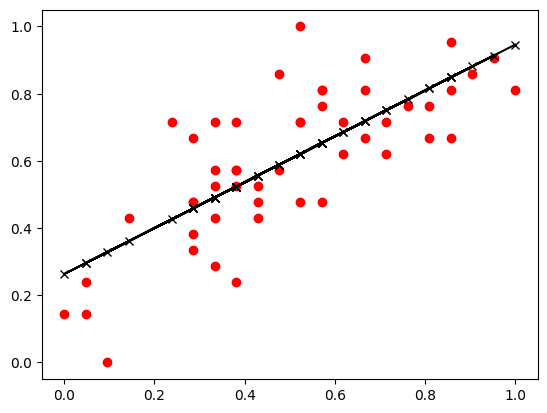

In [60]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), y_pred.numpy(), 'kx-', label='Fitting Line') # valores previstos
plt.show()

### Parâmetro treinado

In [61]:
print(model.w) # pesos finais

tensor([[0.2633, 0.6826]])


In [62]:
x_bias = x_train_bias
y = y_train
w_opt = (torch.inverse(x_bias.t().matmul(x_bias)).matmul(x_bias.t())).matmul(y)
print(w_opt.t()) # pesos ótimos

tensor([[0.2613, 0.6865]])
